In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
csv = pd.read_csv('dados/precos-gasolina-etanol-07.csv', delimiter=';')
comb_jul = pd.DataFrame(csv)
comb_jul.head()

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,SE,ES,COLATINA,SAO FRANCISCO DE ASSIS COMERCIO DE COMBUSTIVEI...,08.519.545/0001-10,PRACA FIDELIS FERRARI,35,NaN,LACE,29703-030,GASOLINA ADITIVADA,01/07/2022,"7,48",NaN,R$ / litro,VIBRA ENERGIA
1,SE,ES,COLATINA,SAO FRANCISCO DE ASSIS COMERCIO DE COMBUSTIVEI...,08.519.545/0001-10,PRACA FIDELIS FERRARI,35,NaN,LACE,29703-030,GASOLINA,01/07/2022,"7,38",NaN,R$ / litro,VIBRA ENERGIA
2,SE,ES,COLATINA,POSTO MOTOCAP LTDA,04.814.652/0001-10,PRACA ALMIRANTE BARROSO,52,LETRA A,LACE,29703-055,ETANOL,01/07/2022,"5,99",NaN,R$ / litro,VIBRA ENERGIA
3,SE,ES,COLATINA,POSTO MOTOCAP LTDA,04.814.652/0001-10,PRACA ALMIRANTE BARROSO,52,LETRA A,LACE,29703-055,GASOLINA,01/07/2022,"7,39",NaN,R$ / litro,VIBRA ENERGIA
4,CO,GO,GOIANIA,JUSTINIANO & JUSTINIANO LTDA,04.489.287/0001-16,AVENIDA JOSE LEANDRO DA CRUZ,"2,36","QUADRA 18, LOTE 01",PARQUE AMAZONIA,74840-390,GASOLINA ADITIVADA,01/07/2022,"6,49",NaN,R$ / litro,IPIRANGA


In [4]:
csv = pd.read_csv('dados/precos-gasolina-etanol-08.csv', delimiter=';')
comb_ago = pd.DataFrame(csv)
comb_ago.head(1)

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,NE,AL,ARAPIRACA,AUTO POSTO M M GARROTE LTDA,08.738.994/0001-50,RODOVIA AL-220,5848,KM 96,BOM SUCESSO,57309-035,ETANOL,01/08/2022,"4,79",NaN,R$ / litro,VIBRA ENERGIA


In [5]:
conjunto_dados = pd.concat([comb_jul, comb_ago])
conjunto_dados.head(1)

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,SE,ES,COLATINA,SAO FRANCISCO DE ASSIS COMERCIO DE COMBUSTIVEI...,08.519.545/0001-10,PRACA FIDELIS FERRARI,35,NaN,LACE,29703-030,GASOLINA ADITIVADA,01/07/2022,"7,48",NaN,R$ / litro,VIBRA ENERGIA


In [6]:
((conjunto_dados.isnull().sum() / conjunto_dados.shape[0]) * 100).sort_values(ascending=False)

Valor de Compra      100.000000
Complemento           78.707461
Bairro                 0.323960
Numero Rua             0.055828
Regiao - Sigla         0.000000
Estado - Sigla         0.000000
Municipio              0.000000
Revenda                0.000000
CNPJ da Revenda        0.000000
Nome da Rua            0.000000
Cep                    0.000000
Produto                0.000000
Data da Coleta         0.000000
Valor de Venda         0.000000
Unidade de Medida      0.000000
Bandeira               0.000000
dtype: float64

In [7]:
copia_dados = conjunto_dados.copy()
copia_dados.shape[:]

(127176, 16)

In [8]:
copia_dados['Valor de Venda'] = copia_dados['Valor de Venda'].apply(lambda y: float(str(y.replace(',','.'))))
copia_dados.head(2)

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,SE,ES,COLATINA,SAO FRANCISCO DE ASSIS COMERCIO DE COMBUSTIVEI...,08.519.545/0001-10,PRACA FIDELIS FERRARI,35,NaN,LACE,29703-030,GASOLINA ADITIVADA,01/07/2022,7.48,NaN,R$ / litro,VIBRA ENERGIA
1,SE,ES,COLATINA,SAO FRANCISCO DE ASSIS COMERCIO DE COMBUSTIVEI...,08.519.545/0001-10,PRACA FIDELIS FERRARI,35,NaN,LACE,29703-030,GASOLINA,01/07/2022,7.38,NaN,R$ / litro,VIBRA ENERGIA


In [9]:
copia_dados = copia_dados.drop(['Valor de Compra'], axis=1)
copia_dados.head(1)

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Unidade de Medida,Bandeira
0,SE,ES,COLATINA,SAO FRANCISCO DE ASSIS COMERCIO DE COMBUSTIVEI...,08.519.545/0001-10,PRACA FIDELIS FERRARI,35,NaN,LACE,29703-030,GASOLINA ADITIVADA,01/07/2022,7.48,R$ / litro,VIBRA ENERGIA


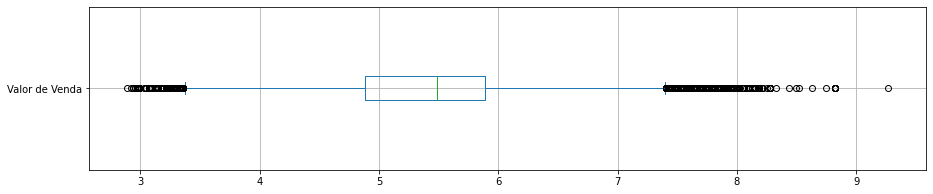

In [28]:
copia_dados['Valor de Venda'].plot(kind='box', vert=False, figsize=(15,3), grid=True)
plt.show()

In [11]:
copia_dados.describe()

,Valor de Venda
count,127176.000000
mean,5.355503
std,0.860449
min,2.890000
25%,4.880000
50%,5.490000
75%,5.890000
max,9.270000


In [12]:
copia_dados['Valor de Venda'].quantile(0.75)

5.89

In [13]:
copia_dados['Valor de Venda'].quantile(0.9999)

8.361074999998529

In [14]:
print(copia_dados['Valor de Venda'].max())
copia_dados['Valor de Venda'].min()

9.27


2.89

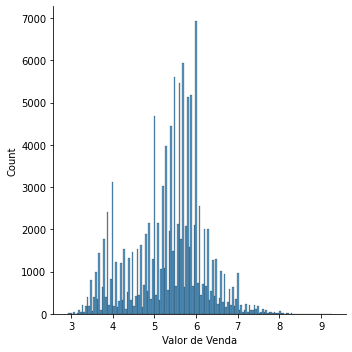

In [15]:
sns.displot(copia_dados['Valor de Venda'])

In [16]:
copia_dados.quantile(0.99)

Valor de Venda    7.33
Name: 0.99, dtype: float64

In [17]:
#len(copia_dados[copia_dados['Valor de Venda'] > ??)

In [18]:
copia_dados.quantile(0.05)

Valor de Venda    3.79
Name: 0.05, dtype: float64

In [19]:
# Eliminar só os valores maiores?
# ou
# Eliminar igualmente nas duas pontas?